**--------------------------- By: Radhika Popli(16501020204) and Mimansa Chhabra (11901012024)------------------------------**

Problem Statement: Predict student return behavior to AI tools and estimate market fit across academic levels, tasks,
and disciplines using ML.

*------------------------------------------------Basic imports------------------------------------------------*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("ai_assistant_usage_student_life.csv")
df.head(3)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,03-11-2024,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,25-08-2024,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,12-01-2025,19.22,5,Coding,3,Assignment Completed,True,3.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*------------------------------------------------Handling missing values------------------------------------------------*

In [ ]:
df.isnull().sum()

,0
SessionID,0
StudentLevel,0
Discipline,0
SessionDate,0
SessionLengthMin,0
TotalPrompts,0
TaskType,0
AI_AssistanceLevel,0
FinalOutcome,0
UsedAgain,0


*------------------------------------------------Checking Duplicates------------------------------------------------*

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape                                         #Shape remains same (No duplicates)

(10000, 11)

*------------------------------------------------Info about the data------------------------------------------------*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [ ]:
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


*------------------------------------------------Function Transformation------------------------------------------------*

In [ ]:
#Log transformation
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer( func = lambda x : np.log1p(x) )
ft.fit(df['SessionLengthMin'])
df['SessionLengthMin'] = ft.transform(df['SessionLengthMin'])


/tmp/ipython-input-1407093878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['SessionLengthMin'])


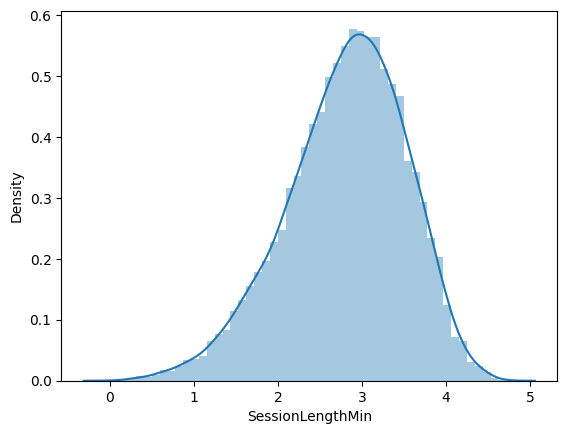

In [ ]:
sb.distplot(df['SessionLengthMin'])
plt.show()

*------------------------------------------------Detetcing outliers------------------------------------------------*

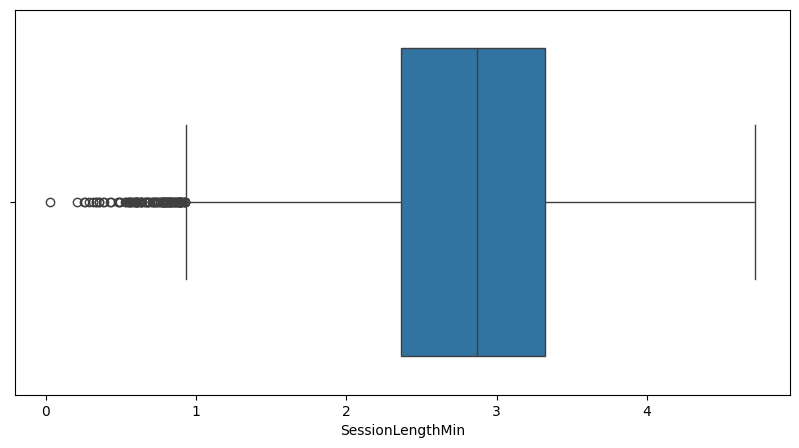

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(x='SessionLengthMin' , data=df)
plt.show()

/tmp/ipython-input-1407093878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['SessionLengthMin'])


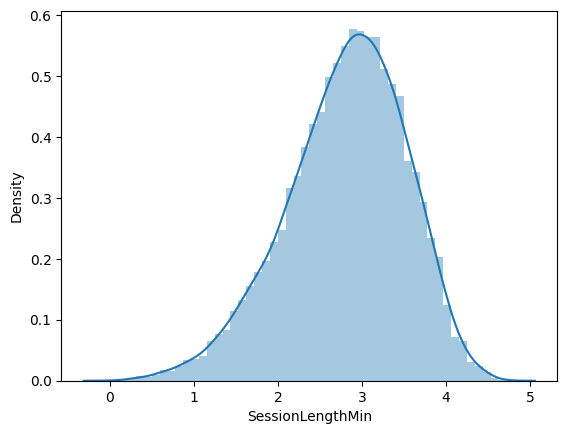

In [ ]:
sb.distplot(df['SessionLengthMin'])
plt.show()

*------------------------------------------------Removing outliers------------------------------------------------*

In [ ]:
quartile1 = df['SessionLengthMin'].quantile(0.25)
quartile3 = df['SessionLengthMin'].quantile(0.75)
IQR  = quartile3 - quartile1
lower_bound = quartile1 - 1.5 * IQR
upper_bound = quartile3 + 1.5 * IQR

df = df[(df['SessionLengthMin'] >= lower_bound) & (df['SessionLengthMin'] <= upper_bound)]
df['SessionLengthMin'].shape

(9902,)

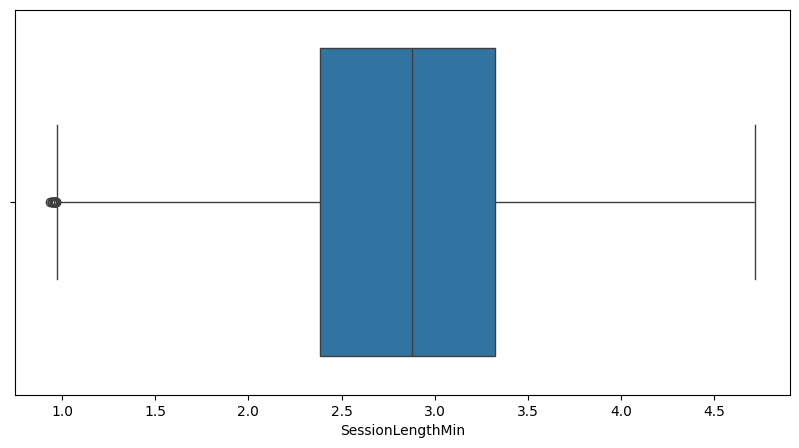

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(x='SessionLengthMin' , data=df)
plt.show()

/tmp/ipython-input-1407093878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['SessionLengthMin'])


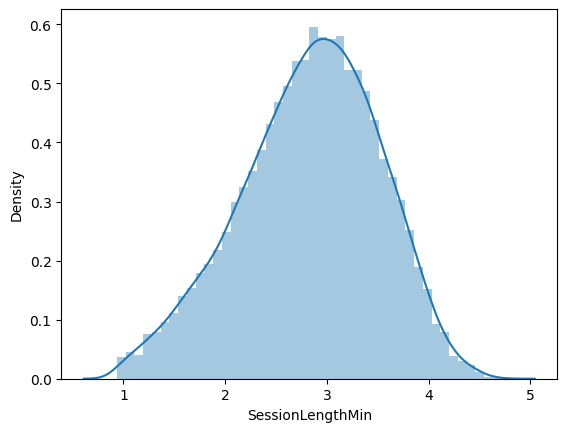

In [ ]:
sb.distplot(df['SessionLengthMin'])
plt.show()

*------------------------------------------------Dropping redundant columns------------------------------------------------*

In [ ]:
# Drop redundant columns
df = df.drop(columns=['SessionID', 'SessionDate', 'FinalOutcome', 'TotalPrompts'])

*------------------------------------------------Encoding------------------------------------------------*

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode UsedAgain (target)
df['UsedAgainEncoded'] = LabelEncoder().fit_transform(df['UsedAgain'])  # Yes/No → 1/0

*------------------------------------------------Splitting test and train data------------------------------------------------*

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define X and y
X = df.drop(columns=['UsedAgain'])
y = df['UsedAgain']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocessing pipeline
numeric_features = ['SessionLengthMin', 'AI_AssistanceLevel', 'SatisfactionRating']
categorical_features = ['StudentLevel', 'Discipline', 'TaskType']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

*------------------------------------------------ Modelling ------------------------------------------------*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ===============================
#  Model-1: Logistic Regression
# ===============================
lr_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

lr_params = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)

# =======================
#  Model-2: Random Forest
# =======================
rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# ===================
# Model-3: XGBoost
# ===================
xgb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:03:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['SessionLengthMin',
                                                                          'AI_AssistanceLevel',
                                                                          'SatisfactionRating']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['StudentLevel',
                                                                          'Discipline',
                                                                          'TaskType'])])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsam...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

*------------------------------------------------ Evaluation ------------------------------------------------*

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#  Evaluate all models
models = {
    "Logistic Regression": lr_grid,
    "Random Forest": rf_grid,
    "XGBoost": xgb_grid
}

print("\nModel Performance Summary:\n")
for name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)   # Yes is encoded as 1
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

    print(f"=== {name} ===")
    print(f"Best Params: {model.best_params_}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print()



Model Performance Summary:

=== Logistic Regression ===
Best Params: {'classifier__C': 0.01, 'classifier__solver': 'lbfgs'}
Accuracy : 0.7219
Precision: 0.7219
Recall   : 1.0000
Confusion Matrix:
[[1430    0]
 [ 551    0]]

=== Random Forest ===
Best Params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Accuracy : 0.7219
Precision: 0.7221
Recall   : 0.9993
Confusion Matrix:
[[1429    1]
 [ 550    1]]

=== XGBoost ===
Best Params: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Accuracy : 0.7219
Precision: 0.7219
Recall   : 1.0000
Confusion Matrix:
[[1430    0]
 [ 551    0]]

